# Titanic - Machine Learning from Disaster
---

Copyright [2021] [Data Scientist & ML Engineer: [Ahmed](https://www.kaggle.com/dsxavier/)]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## An Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## [Data Dictionary](https://www.kaggle.com/c/titanic/data#:~:text=should%20look%20like.-,data%20dictionary,-Variable)


<table>
<thead>
  <tr>
    <th>Variable</th>
    <th>Definition</th>
    <th>Key</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>survival</td>
    <td>Survival</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>pclass</td>
    <td>Ticket class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>sex</td>
    <td>Sex</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age in years</td>
    <td></td>
  </tr>
  <tr>
    <td>sibsp</td>
    <td># of siblings / spouses aboard the Titanic</td>
    <td></td>
  </tr>
  <tr>
    <td>parch</td>
    <td># of parents / children aboard the Titanic</td>
    <td></td>
  </tr>
  <tr>
    <td>ticket</td>
    <td>Ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>fare</td>
    <td>Passenger fare</td>
    <td></td>
  </tr>
  <tr>
    <td>cabin</td>
    <td>Cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>embarked</td>
    <td>Port of Embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</tbody>
</table>

---

## Table of Contents

<table>
<thead>
  <tr>
      <th><a href='#Table-of-Contents'>Table of Contents</a></th>
    <th></th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
      <td><a href='#Dependencies'>Dependencies</a><br></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#(A)-Import-Libraries'>(A) Import Libraries</a></td>
    <td></td>
  </tr>
  <tr>
      <td><a href='#Workflow-Pipeline'>Workflow Pipeline</a></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#1.-Data-Preprocessing'>1. Data Preprocessing</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
      <td><a href='#(A)-Data-Wrangling'>(A) Data Wrangling</a></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
      <td><a href='#(B)-Exploratory-Data-Analysis'>(B) Exploratory Data Analysis</a></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#2.-Train-&-Test-Split'>2. Train & Test Split</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#3.-Algorithm-Setup'>3. Algorithm Setup</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#4.-Model-Fitting'>4. Model Fitting</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#5.-Model-Predictions'>5. Model Predictions</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#6.-Model-Evalutaion'>6. Model Evalutaion</a></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
      <td><a href='#7.-Export-Predictions'>7. Export Predictions</a></td>
    <td></td>
  </tr>
</tbody>
</table>

## Dependencies

### (A) Import Libraries

In [1]:
# Using this for auto-compeletion..
%config Completer.use_jedi = False

In [2]:
import os
from typing import Text, List, Dict, Set, Tuple, Optional, Union

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [18, 10]
plt.style.use('fivethirtyeight')
%matplotlib inline

---

## Workflow Pipeline

### 1. Data Preprocessing

First, we're going to explore the titanic dataset and start do some data wrangling and EDA 

#### (A) Data Wrangling

In [3]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We noticed that; `Age` has `NaN` values, but if we compared between `Age` and `Cabin`, you can see that `Age` can be handled compared with `Cabin`.

- <span style='color:green;'><b>Notice:</b></span> We're going to handle `Cabin` at the end, so we can get the benefit from it, too.

Now, Let's do some **Feature Engineering**

##### **Feature Engineering**

<span style='color:CornflowerBlue;font-size:16px'>Feature 01: Age</span>

In [8]:
train_data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

To fill the `NaN` values in the `Age` column, we can get the highest frequency of `Age` and start to fulfil it randomly instead of the `NaN` values. 

Note: 
- We're going to select the highest 10 frequencies of our `Age` class and their frequencies and then, we're going to assign them, randomly.

In [9]:
train_data['Age'].value_counts().head(10)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

To have a fair probability between all the `NaN` values replacements, we need to normalize the frequency of our `Age` feature so the total sum of the probability is equal 1. .

Equation for that is;

# $X_{norm} = \frac{{1}}{\sum_{i}^{N}{x_i}}\times{x_j}$

In [10]:
age_highest_freq = train_data['Age'].value_counts().head(10).index.values
freq_of_highes_age = train_data['Age'].value_counts().head(10).values
age_probabilities = list(map(lambda value: (1/sum(freq_of_highes_age)) * value,
                             freq_of_highes_age))

In [11]:
train_data['Age'] = train_data['Age'].apply(lambda value: value if not np.isnan(value) 
                                            else np.random.choice(age_highest_freq,
                                                                  p=age_probabilities))

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<span style='color:CornflowerBlue;font-size:16px'>Feature 02: Embarked</span>

`Embarked` Feature has only 1 missing value, we can fill this value with the mode value of the `Embarked` feature.

In [13]:
train_data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [14]:
freq = train_data['Embarked'].value_counts().values[0]
train_data['Embarked'].fillna(freq, inplace=True)

In [15]:
train_data['Embarked'].isnull().value_counts()

False    891
Name: Embarked, dtype: int64

Let's check the values inside the feature

In [16]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', 644], dtype=object)

We can see that `Embarked` has a number inside its values. Let's change this number of the max frequency value inside this feature.

In [17]:
train_data['Embarked'].replace(to_replace=644,
                               value=train_data['Embarked'].value_counts().index.values[0],
                               inplace=True)

In [18]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Before continuing **Feature Engineering** – all the features are stable now. We need to expand our vision more to understand the data that we have before applying any additional FE. What is going to help us in our mission of understanding the dataset is EDA.

#### (B) Exploratory Data Analysis

First, we need to check the correlation between the features – this might be the first step to help us identify which feature will be really helpful in predictions.

In [19]:
train_corr = train_data.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038118,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.056651,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.350056,0.083081,0.018443,-0.549500
Age,0.038118,-0.056651,-0.350056,1.000000,-0.221271,-0.155235,0.104624
SibSp,-0.057527,-0.035322,0.083081,-0.221271,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.155235,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.104624,0.159651,0.216225,1.000000


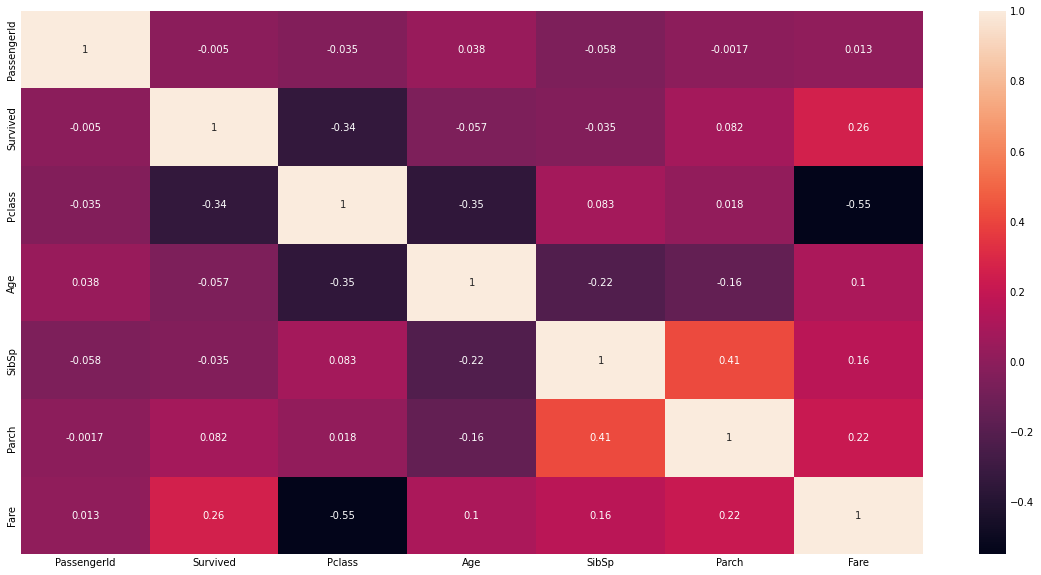

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(train_corr, annot=True)
plt.show()

The correlation between the features and the label beside the features within itself needs more work so we can discover the patterns.

Let's go back to the FE

<span style='color:CornflowerBlue;font-size:16px'>Feature 03: Name</span>

The idea behind slicing `Name` helps for observing patterns from the name of the passengers and converting them into a categorical feature.

- <span style='color:green;'><b>Read This article:</b></span> <a href="https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/">Basic Feature Engineering with the Titanic Data</a>

In [21]:
TITLES = ('Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
          'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
          'Don', 'Jonkheer')

In [22]:
def patterns(name: Text, titles: Set) -> Optional[Text]:
    for title in titles:
        if title in name:
            return title
    return "Untitled"

In [23]:
train_data['Title'] = train_data['Name'].apply(lambda name: patterns(name, TITLES))

In [24]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


Now, That's good but not perfect – we want to squeeze the number of categories in the feature. We can iterate throw all the observations and check the type of title this person has, but we may have a problem! One of the titles is "*Dr*". This title can fit both ["Men", "Women"] – we will have to add one more feature to help us decide whether this person is a "*Male*" or "*Female*", we will use `Sex` for this job.

In [25]:
def squeeze_title(dataframe: pd.DataFrame) -> Text:
    title = dataframe['Title']
    if title in ('Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col'):
        return 'Mr'
    elif title in ('Countess', 'Mme'):
        return 'Mrs'
    elif title in ('Mlle', 'Ms'):
        return 'Miss'
    elif title == 'Dr':
        if dataframe['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [26]:
train_data['Title'] = train_data.apply(squeeze_title, axis=1) 
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


<u>Quoted from *TRIANGLEINEQUALITY*</u>
> *You may be interested to know that ‘Jonkheer’ is a male honorific for Dutch nobility. Also interesting is that I was tempted to just send ‘Dr’ -> ‘Mr’, but decided to check first, and there was indeed a female doctor aboard! It seems 1912 was further ahead of its time than Doctor Who!*

> *Curious, I looked her up: her name was Dr. Alice Leader, and she and her husband were physicians in New York city*.[$^1$](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)

![](https://i0.wp.com/www.encyclopedia-titanica.org/images/leader_af.jpg)

<span style='color:CornflowerBlue;font-size:16px'>Feature 04: Cabin & Pclass</span>

To work on `Cabin`, we need to understand what these values related to, the letters before each number. So that, we need to understand the infrastructure of the ship. 

After Reading more about how `Cabin` is related to passengers in Titanic – you can find this article in **dummies** – [Duites and Cabins for Passengers on the Titanic](https://www.dummies.com/article/academics-the-arts/history/20th-century/suites-and-cabins-for-passengers-on-the-titanic-180677). 

This article explains the correlation between the `Cabin` and the `Passenger Class (Pclass)`: we were not able to observe that from the correlation diagram since `Cabin` has lot of `NaN` values.

According to **dummies**:

- Titanic's `Passenger first-class` Cabins:

> *First-class accommodations were located amidships, <u>where the rocking of the ship was less keenly felt and passengers were less likely to get seasick</u>. They were decorated opulently in different period styles: Queen Anne, Louis XVI, and Georgian.*

- Titanic's `Passenger second-class` Cabins:

> *passengers slept in berths built into the walls of the cabins. At two to four berths per cabin, privacy was hard to come by, although a passenger could close the curtain around his or her berth. <u>Each second-class cabin had a washbasin and a chamber pot to be used in case of seasickness</u>.*

- Titanic's `Passenger third-class` Cabins:

> *passengers slept on bunk beds in crowded quarters at six to a narrow cabin. Like second-class passengers, they shared bathrooms, but the number of people sharing a bathroom was much higher in third class: Only two bathtubs were available for all 710 third-class passengers, one for the men and one for the women.*

![](https://miro.medium.com/max/1400/1*VeHSAW_AxHz-GYwexWfdQg.jpeg)

Ref: [Titanic Survival Analysis Using R](https://chanida-limt.medium.com/titanic-survival-prediction-c421aac8da32)

Group the data by `Pclass`

In [27]:
CaPc = train_data.groupby('Pclass').count()
CaPc

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Pclass,,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,216,216
2,184,184,184,184,184,184,184,184,184,16,184,184
3,491,491,491,491,491,491,491,491,491,12,491,491


According to **BBC**: 
> *The first half of the ship reaches the botton first. Two minutes later, the back half of the Titanic joins it on the floor of the Atlantic.*

The first half of the ship is the place where most first-class cabins exist. So, using the `Cabin` feature may help us if we extract the letters from the `Cabin` observation will help us as it represents the Deck.

<Figure size 1296x720 with 0 Axes>

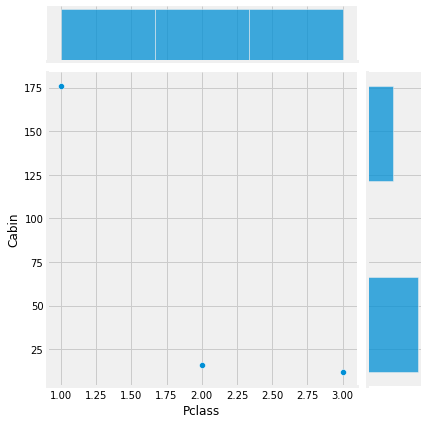

In [28]:
plt.figure(figsize=(18,10))
sns.jointplot(x='Pclass', y='Cabin', data=CaPc, dropna=True)
plt.show()

`NaN` Cabins will be replaced with `Unknown`

In [29]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_data['Deck'] = train_data['Cabin'].apply(lambda letter:
                                               patterns(str(letter), cabin_list))
train_data.drop(columns='Cabin', inplace=True)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Untitled
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Untitled
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Untitled


<span style='color:CornflowerBlue;font-size:16px'>Feature 05: SibSp & Parch</span>

Let's visualize the `# of siblings / spouses aboard the Titanic (SibSp)` and `# of parents / children aboard the Titanic (Parch)` with `Survived` Class & the Linear Correlation between them

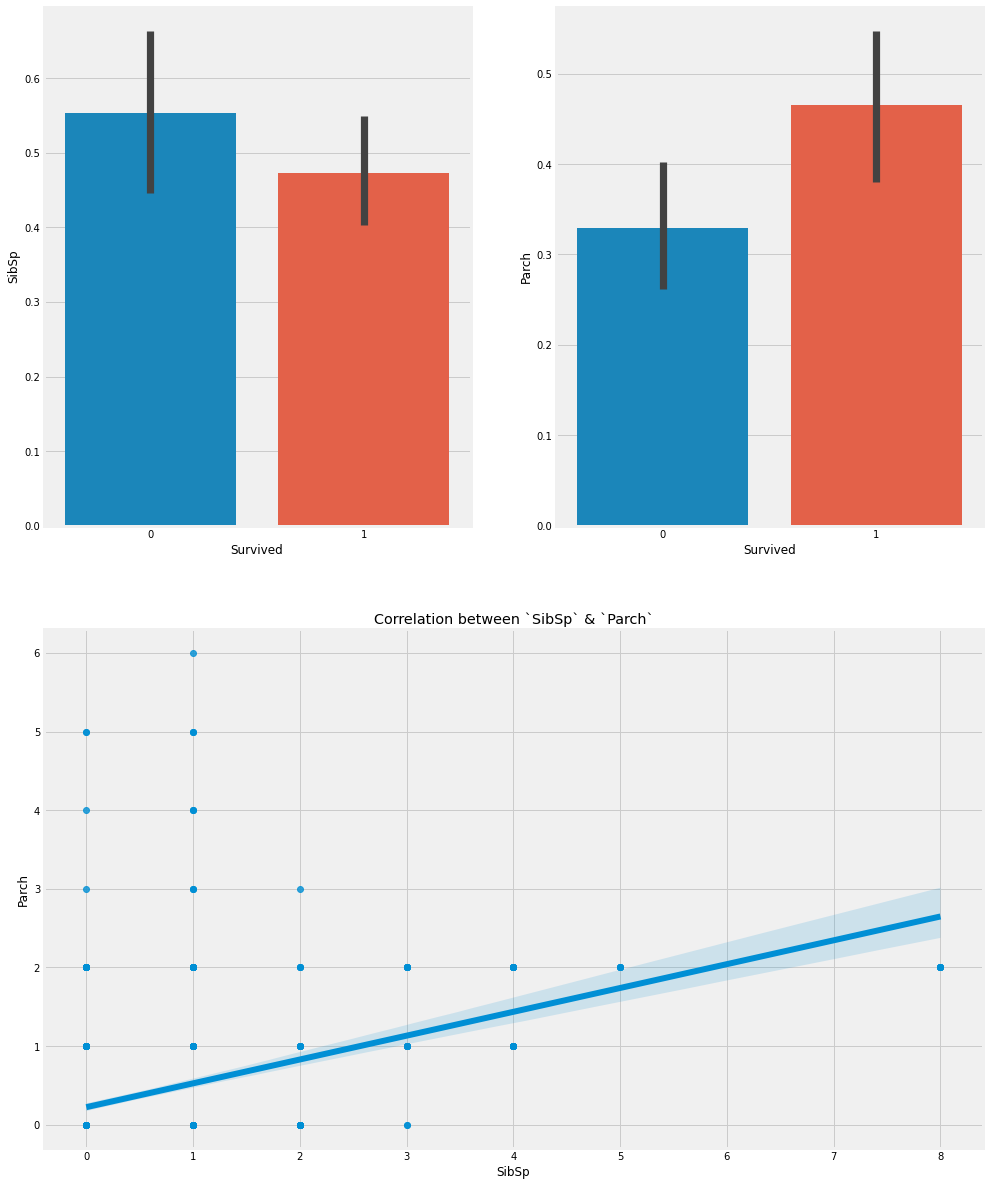

In [31]:
fig = plt.figure(figsize=(15,21))
SS_SUR = fig.add_subplot(221)
PC_SUR = fig.add_subplot(222)
SS_PC = fig.add_subplot(2,2,(3,4))

sns.barplot(x='Survived', y='SibSp', data=train_data, ax=SS_SUR)
sns.barplot(x='Survived', y='Parch', data=train_data, ax=PC_SUR)

SS_PC.title.set_text("Correlation between `SibSp` & `Parch`")
sns.regplot(x='SibSp', y='Parch', data=train_data, ax=SS_PC)

plt.show()

We can see, there're **positive Linear Correlation** between `SibSp` and `Parch`. Maybe this shows us – most people who had family relationships in the ship are more likely to risk themselves to rescue their family, especially if they're siblings/spouses.

Why not combine them!? Both features are likely to fit the same idea. It will be really efficient when we're going to use decision tree classification.

In [32]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch']
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family_size
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,Mr,Untitled,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,Miss,B,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.45,S,Miss,Untitled,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,Mr,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Mr,Untitled,0


<span style='color:CornflowerBlue;font-size:16px'>Feature 06: Age & Pclass & Fare</span>

First, Let's check if the anyone from *First-class* or the *Second-class* has `Fare =0.0`. If so, we can't involve price with us.

In [33]:
train_data[["Pclass", "Fare"]].loc[train_data['Fare'] == 0,:]

,Pclass,Fare
179,3,0.0
263,1,0.0
271,3,0.0
277,2,0.0
302,3,0.0
413,2,0.0
466,2,0.0
481,2,0.0
597,3,0.0
633,1,0.0


These data are likely missed. We can't cross `Fare` with `Pclass`.

In [34]:
train_data[['Pclass', 'Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


We can see that – `P-class` and `Fare` have **Negative Linear Correlation**. (Note that we're trying to check the linear correlation although this is a categorical feature, we're doing that for the sake of seeing the effection on the `Fare` feature).

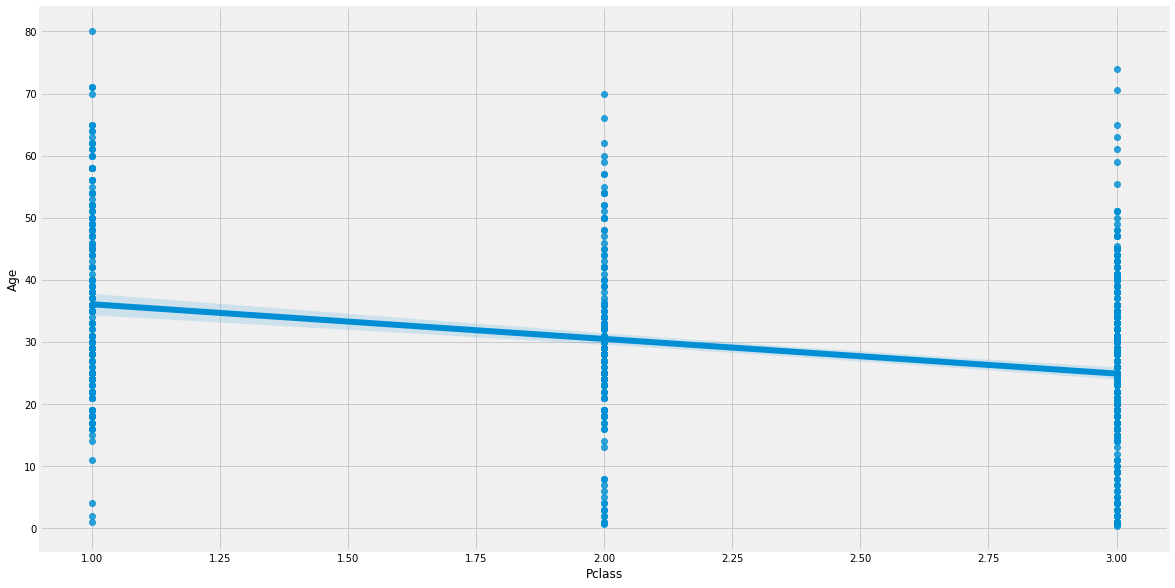

In [35]:
plt.figure(figsize=(18,10))
sns.regplot(x='Pclass', y='Age', data=train_data)
plt.show()

**What's the `Age` most of ppl `Died`?**

In [36]:
tester = train_data.copy()
tester[['Survived', 'Died']] = pd.get_dummies(tester['Survived'])
age_sur = tester[['Age', 'Survived', 'Died']].groupby('Age').sum()
age_sur.reset_index(inplace=True)
age_sur.sort_values(by=['Died', 'Survived'], ascending=False, inplace=True)
age_sur.head(10)

,Age,Survived,Died
31,24.0,27,20
23,18.0,36,18
38,29.0,21,15
48,36.0,21,15
33,25.0,33,13
36,28.0,32,13
39,30.0,31,13
28,22.0,29,13
24,19.0,23,12
27,21.0,28,11


Young age are the most people died, specially `Age` of **24**, maybe this has been effected by filling the missing value!

Let's check if there's any correlation between the `Age` and `Fare`

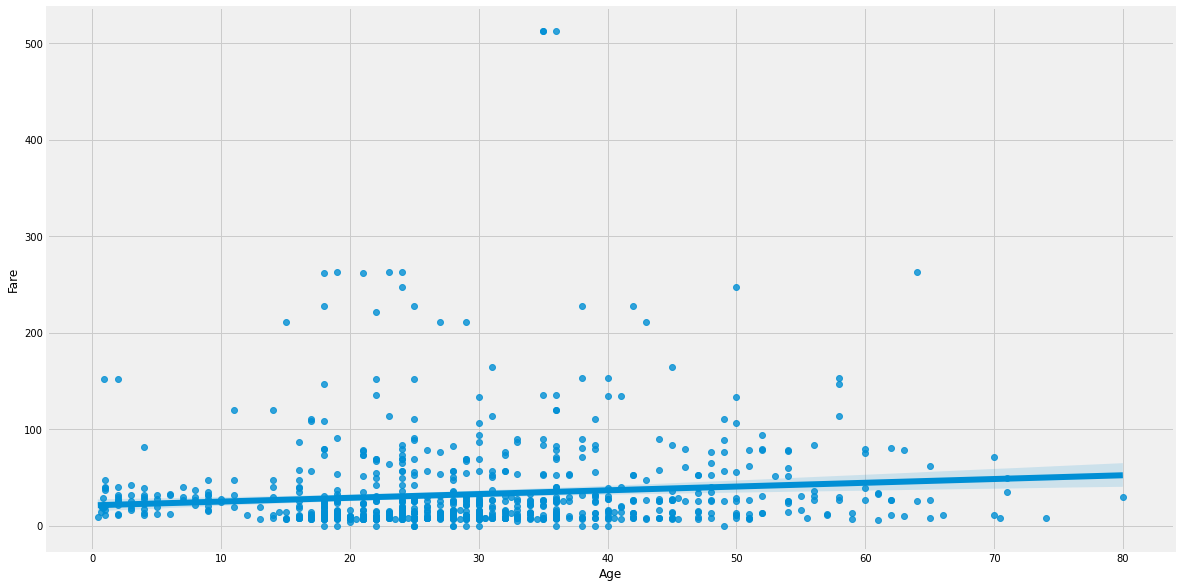

In [37]:
plt.figure(figsize=(18,10))
sns.regplot(x='Age', y='Fare', data=train_data)
plt.show()

As we can see, `Age` and `Fare` have **Weak Linear Correlation**, which means; I can't apply feature cross on them even if I want.

<span style='color:CornflowerBlue;font-size:16px'>Feature 06: Sex & Title</span>

We need to check the `Title` with the `Sex` to see if our FE works well

<Figure size 1296x720 with 0 Axes>

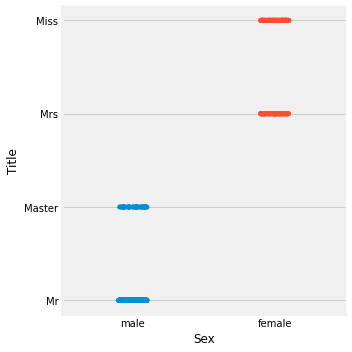

In [38]:
plt.figure(figsize=(18,10))
sns.catplot(x='Sex', y='Title', data=train_data)
plt.show()

Now, Let's clear our dataset from any useless features and prepare the dataset for our next phase which is **Train & Test Split**.

In [39]:
train_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

For formatting purposes – we want to shift our `Survive` Label to the end of the table. Also, we need to add each Feature corresponding to its correlations. For the sake of curiosity, let's check the correlation between the new features and the old ones after deleting unnecessary features

In [40]:
COLUMNS = ['Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Family_size', 'Pclass',
           'Fare', 'Deck', 'Embarked', 'Survived']
train_data = train_data[COLUMNS]
train_data

,Title,Sex,Age,SibSp,Parch,Family_size,Pclass,Fare,Deck,Embarked,Survived
0,Mr,male,22.0,1,0,1,3,7.2500,Untitled,S,0
1,Mrs,female,38.0,1,0,1,1,71.2833,C,C,1
2,Miss,female,26.0,0,0,0,3,7.9250,Untitled,S,1
3,Mrs,female,35.0,1,0,1,1,53.1000,C,S,1
4,Mr,male,35.0,0,0,0,3,8.0500,Untitled,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,Mr,male,27.0,0,0,0,2,13.0000,Untitled,S,0
887,Miss,female,19.0,0,0,0,1,30.0000,B,S,1
888,Miss,female,19.0,1,2,3,3,23.4500,Untitled,S,0
889,Mr,male,26.0,0,0,0,1,30.0000,C,C,1


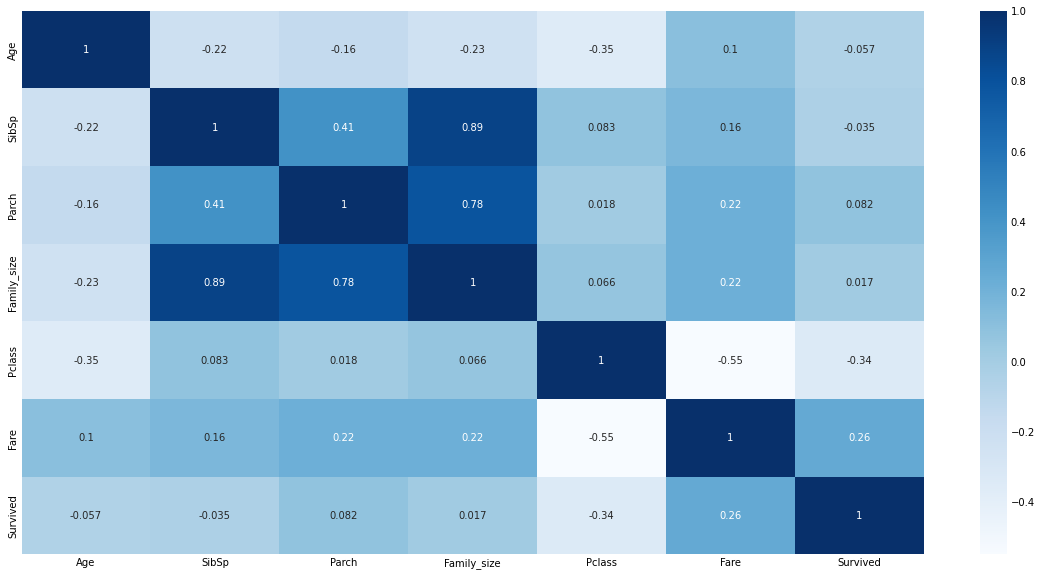

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), cmap='Blues', annot=True)
plt.show()

The Correlation after **Feature Engineering** is efficient!

### 2. Train & Test Split

Let's split our train dataset into a train, and test datasets [75, 25].

In [42]:
y_label = train_data['Survived']
X_features = train_data.iloc[:,:-1]
X_features

,Title,Sex,Age,SibSp,Parch,Family_size,Pclass,Fare,Deck,Embarked
0,Mr,male,22.0,1,0,1,3,7.2500,Untitled,S
1,Mrs,female,38.0,1,0,1,1,71.2833,C,C
2,Miss,female,26.0,0,0,0,3,7.9250,Untitled,S
3,Mrs,female,35.0,1,0,1,1,53.1000,C,S
4,Mr,male,35.0,0,0,0,3,8.0500,Untitled,S
...,...,...,...,...,...,...,...,...,...,...
886,Mr,male,27.0,0,0,0,2,13.0000,Untitled,S
887,Miss,female,19.0,0,0,0,1,30.0000,B,S
888,Miss,female,19.0,1,2,3,3,23.4500,Untitled,S
889,Mr,male,26.0,0,0,0,1,30.0000,C,C


In [43]:
folds = 4
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    y_label,
                                                    test_size=(1/folds),
                                                    random_state=42,
                                                    stratify=y_label)

One of the critical things I read that written by *Prof. Andrew Neg* in his book **Machine Learning Yearning** – the proportion between your train, dev, and test data has to be on the same line of the distribution, you can't have a different proportion between your train, and test data and you expect to give you high accuracy.

`stratify` parameter in `train_test_split` accomplish that goal for you. When it splits the label, it will make sure that the proportion of the training label is similar to the proportion of the testing label.

But we still can face the problem of overfitting..but how!? We're going to face the problem of overfitting because we split our data, randomly. We need to ensure that even if we sent weak hyperparameter to our probabilistic models, it wouldn't go throw overfitting because of <u>skew distribution</u>.

Therefore, I always prefer to add a procedure called **[cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))**

### 3. Algorithm Setup

Since this project is all about classification, we're going to set up the best probabilistic models that can help us to predict the highest accuracy we can obtain.

But first, we want to make sure that our datasets have transformed & normalized, correctly. So, we're going to build a transformed pipeline to add our features into it.Since this project is all about classification, we're going to set up the best probabilistic models that can help us to predict the highest accuracy we can obtain.

But first, we want to make sure that our datasets have transformed & normalized, correctly. So, we're going to build a transformed pipeline to add our features into it.

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

First, we're going to start with building the transformers pipeline

In [45]:
NUMERICAL_COLUMNS = ["Age", "SibSp", "Parch", "Family_size", "Fare"]
CATEGORICAL_COLUMNS = ["Title", "Sex", "Pclass", "Deck", "Embarked"]

In [46]:
transformers = make_column_transformer(
                                       (StandardScaler(), NUMERICAL_COLUMNS),
                                       (OneHotEncoder(handle_unknown='ignore'),
                                                      CATEGORICAL_COLUMNS))

Then, we're going to the Models' pipeline. If you want to have multiple models in one pipeline, we can do that by building a [custom estimator](https://stackoverflow.com/questions/48507651/multiple-classification-models-in-a-scikit-pipeline-python#:~:text=consider%20checking%20out%20similar%20questions%20here%3A).

In [47]:
class ClfSwitcher(BaseEstimator):
    
    def __init__(self, 
                 estimator = DecisionTreeClassifier()):
        """
        Custom Estimator is a custom class that helps you to switch
        between classifiers.
        
        Args:
            estimator: sklearn object – classifier
        """
        self.estimator = estimator
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)

In [48]:
pipeline = Pipeline([
    ('transformer', transformers),
    ('clf', ClfSwitcher())
])

parameters = [
    {
        'clf__estimator': [DecisionTreeClassifier()],
        'clf__estimator__criterion': ['gini', 'entropy'],

    },
    {
        'clf__estimator': [ExtraTreesClassifier()],
        'clf__estimator__n_estimators': [100, 250],
        'clf__estimator__criterion': ['gini', 'entropy'],

    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [100, 250],
        'clf__estimator__criterion': ['gini', 'entropy'],
    },
    {
        'clf__estimator': [SVC()],
        'clf__estimator__kernel': ['rbf', 'sigmoid'],
        'clf__estimator__C': [1e-3, 1e-2, 1e-1, 1.0, 10., 1e+2, 1e+3],
        'clf__estimator__degree': [3, 4, 5, 6]
    },
    {
        'clf__estimator': [LogisticRegression()],
        'clf__estimator__penalty': ['l1', 'l2'],
        'clf__estimator__tol': [1e-4, 1e-3, 1e-2],
        'clf__estimator__C': [1e-3, 1e-2, 1e-1, 1.0, 10., 1e+2, 1e+3],
        'clf__estimator__solver': ['lbfgs', 'liblinear']   
    }
    
]

In [49]:
cv = KFold(n_splits=(folds - 1))

### 4. Model Fitting

Now, we're fine-tune the model and see what is the best model, besides what are the best hyperparameters.

In [50]:
gscv = GridSearchCV(pipeline,
                    parameters,
                    cv=cv,
                    scoring='r2',
                    n_jobs=12,
                    verbose=3)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:   12.5s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:   14.9s


[CV] clf__estimator=DecisionTreeClassifier(), clf__estimator__criterion=gini 
[CV]  clf__estimator=DecisionTreeClassifier(), clf__estimator__criterion=gini, score=0.165, total=   0.1s
[CV] clf__estimator=ExtraTreesClassifier(), clf__estimator__criterion=entropy, clf__estimator__n_estimators=100 
[CV]  clf__estimator=ExtraTreesClassifier(), clf__estimator__criterion=entropy, clf__estimator__n_estimators=100, score=0.059, total=   0.9s
[CV] clf__estimator=RandomForestClassifier(), clf__estimator__criterion=gini, clf__estimator__n_estimators=100 
[CV]  clf__estimator=RandomForestClassifier(), clf__estimator__criterion=gini, clf__estimator__n_estimators=100, score=0.152, total=   1.1s
[CV] clf__estimator=RandomForestClassifier(), clf__estimator__criterion=entropy, clf__estimator__n_estimators=100 
[CV]  clf__estimator=RandomForestClassifier(), clf__estimator__criterion=entropy, clf__estimator__n_estimators=100, score=0.188, total=   1.4s
[CV] clf__estimator=SVC(), clf__estimator__C=0.001, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/tmp/ipykernel_20/3915449350.py", line 15, in fit
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penaltie

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Family_size',
                                                                          'Fare']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                       

In [51]:
gscv.best_params_

{'clf__estimator': SVC(),
 'clf__estimator__C': 1.0,
 'clf__estimator__degree': 3,
 'clf__estimator__kernel': 'rbf'}

In [52]:
model = pipeline.set_params(**gscv.best_params_)

In [53]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Family_size', 'Fare']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Title', 'Sex', 'Pclass',
                                                   'Deck', 'Embarked'])])),
                ('clf', ClfSwitcher(estimator=SVC()))])

### 5. Model Predictions

Now, let's test the model we trained using our test data we split from the main train dataset.

In [54]:
y_hat = model.predict(X_test)

### 6. Model Evalutaion

Let's evaluate our model using **Single Evaluation Metric** and **Multi-evaluation Metrics**

1. Single-number Evaluation Metric

In [55]:
model.score(X_test, y_test)

0.8251121076233184

2. Multi-evaluation Metrics

In [56]:
cm = confusion_matrix(y_test, y_hat, labels=[1, 0])
cm

array([[ 65,  21],
       [ 18, 119]])

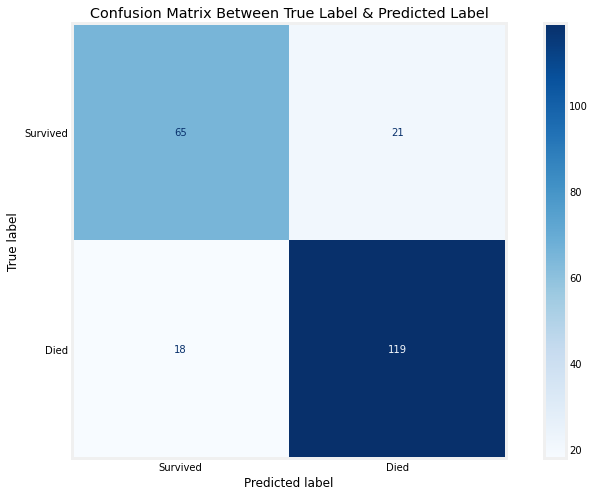

In [57]:
confusion_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                                        display_labels=['Survived', 'Died'])

fig, ax = plt.subplots(1,1,figsize=(12, 8))
ax.grid(False)
confusion_plot.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix Between True Label & Predicted Label')
plt.show()

In [58]:
f1_score(y_test, y_hat)

0.7692307692307692

According to *Prof. Andrew Neg* in a book of **Machine Learning Yearning** – If you want to relay on accurate accuracy for your classification model, you should relay on <u>Multi-evaluation metric</u> [ Precision, Recall ]. You can combine them into <u>single-number evaluation metric</u> which `F1-score `.

### 7. Export Predictions

Lastly, we're going to create a function that apply all the above steps and provide to us the predictions of the `test.csv`.

In [59]:
def prediction_fn(data_dir: Text, model) -> pd.DataFrame:
    """
    A Function created for producing a batch prediction
    for titanic model.
    
    Args:
        data_dir [Text]: directory to the test dataset to use it in the prediction.
        model: model pipeline that is going to be used in the prediction.
    
    Returns:
        pd.DataFrame: predicted dataframe.
    """
    # read dataset
    test_data = pd.read_csv(data_dir, index_col=False)
    
    # pre-processing & Feature Engineering
    ## Age
    age_highest_freq = test_data['Age'].value_counts().head(10).index.values
    freq_of_highes_age = test_data['Age'].value_counts().head(10).values
    age_probabilities = list(map(lambda value: (1/sum(freq_of_highes_age)) * value,
                                 freq_of_highes_age))
    test_data['Age'] = test_data['Age'].apply(lambda value: value if not np.isnan(value) 
                                                else np.random.choice(age_highest_freq,
                                                                      p=age_probabilities))
    ## Embarked
    freq = test_data['Embarked'].value_counts().values[0]
    test_data['Embarked'].fillna(freq, inplace=True)
    test_data['Embarked'].replace(to_replace=644,
                                   value=test_data['Embarked'].value_counts().index.values[0],
                                   inplace=True)
    ## Fare
    test_data['Fare'].fillna(method='bfill', inplace=True)
    ## Title
    test_data['Title'] = test_data['Name'].apply(lambda name: patterns(name, TITLES))
    test_data['Title'] = test_data.apply(squeeze_title, axis=1) 
    
    ## Cabin
    test_data['Deck'] = test_data['Cabin'].apply(lambda letter:
                                                   patterns(str(letter), cabin_list))
    test_data.drop(columns='Cabin', inplace=True)
    
    ## Family Size
    test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']
    
    # Drop the useless features (Only keep PassengerId for merging  it with the predictions)
    passId = test_data['PassengerId']
    test_data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
    
    # Model predictions
    predictions = model.predict(test_data)
    
    # Building the dataframe of the predction values
    predictions = pd.DataFrame(predictions, columns=['Survived'])
    predictions = pd.merge(passId, predictions, left_index=True, right_index=True)
    
    return predictions

In [60]:
import warnings
warnings.filterwarnings('ignore')
prediction = prediction_fn('../input/titanic/test.csv', model)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
prediction.to_csv('gender_submission.csv')
print("You have sucessfully exported the predictions!")

You have sucessfully exported the predictions!


<p style='text-align:center;'>Thanks for reaching this level of expermenting
the idea of</p>
<p style='text-align:center;'><b>Titanic - How Data Scientist applies Analysis & ML</b></p>
<p style='text-align:center;'>Data Scientist & ML Engineer: <a href='https://www.linkedin.com/in/drxavier997/'>Ahmed</a></p>
<p style='text-align:center;'>Created at: 2022-01-13